# 套件

In [1]:
#!pip install yfinance
#!pip install finta

In [2]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 89
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 參數

In [3]:
from datetime import datetime
y_symbol = "^TWII" # 股票代碼 ^TWII 台灣加權指數 美股蘋果 AAPL 台股台積電 2330.TW
startdate = datetime(2008,1,1) # 訓練起始日期
enddate = datetime(2018,1,1) # 訓練結束日期
漲幅  = 1.03 # 漲3%出場
跌幅 = 0.97 # 跌3%出場
持有時間 = 20 #預期要持有多長時間

# 載入資料

https://sharegpt.com/c/nwqFGKt

In [4]:
import yfinance as yf
from datetime import datetime, timedelta

df = yf.download(y_symbol, start = startdate,end = enddate)

display(df)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,8491.570312,8532.919922,8319.580078,8323.049805,8323.017578,4372600
2008-01-03,8171.680176,8243.929688,8130.410156,8184.200195,8184.169434,3636400
2008-01-04,8134.040039,8247.179688,8097.850098,8221.099609,8221.067383,4603600
2008-01-07,7959.919922,8015.930176,7883.370117,7883.370117,7883.339844,4539800
2008-01-08,7909.259766,8011.069824,7895.779785,7962.910156,7962.879883,4618800
...,...,...,...,...,...,...
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300


# Label triple_barrier

https://sharegpt.com/c/Eir89kz

提示詞:
我想請你幫忙做程式碼補全 
#字元後面的描述代表我想做的事情 
<you codeing here>代表請你輸入代碼,
我會貼給你半完成的程式碼 
請你幫我補全程式碼,
我的第一個程式碼如下: 
def triple_barrier_signal(price,ub,lb,t): 
''' triple-barrier包含2個horizontal barrier，1個vertical barrier。 
首先解釋一下這3个barrier： 根據3個barrier中第一個被touch的進行label barrier 1 
(the upper barrier)首先達到，label 1 barrier 2（the lower barrier)首先達到，
label -1 如果barrier 1和barrier 2都没有達到，
则barrier 3達到，label 0 ''' 
signal = [] for i in range(len(price)-t): 
# 情況1.如果price[i:i+t+1]這段序列有任何元素的值大於price[i]*ub則signal[i] = 1 
<you codeing here> 
# 情況2.如果price[i:i+t+1]這段序列有任何元素的值低於price[i]*lb則signal[i] = -1 
<you codeing here> 
# 如果以上情況1和情況2都沒有發生則signal[i] = 0 
<you codeing here> 
return signal



In [5]:
import numpy as np
import math
def triple_barrier_signal(price,ub,lb,t):
  '''
  triple-barrier包含2個horizontal barrier，1個vertical barrier。
  首先解釋一下這3个barrier：
  根據3个barrier中第一個被touch的進行label
  barrier 1 (the upper barrier)首先達到，label 1
  barrier 2（the lower barrier)首先達到，label -1
  如果barrier 1和barrier 2都没有達到，则barrier 3達到，label 0
  '''
  signal = []
  for i in range(len(price)-t):
    # 情況1.如果price[i:i+t+1]這段序列有任何元素的值大於price[i]*ub則signal[i] = 1
    if max(price[i:i+t+1]) > price[i] * ub:
      signal.append(1)
    # 情況2.如果price[i:i+t+1]這段序列有任何元素的值低於price[i]*lb則signal[i] = -1
    elif min(price[i:i+t+1]) < price[i] * lb:
      signal.append(-1)
    # 如果以上情況1和情況2都沒有發生則signal[i] = 0
    else:
      signal.append(0)
  return signal

ret = triple_barrier_signal(df.Close.values.tolist(),漲幅,跌幅,持有時間)
df = df.head(len(ret))
df['triple_barrier_signal'] = ret

<ipython-input-5-a0f8e8e844a3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['triple_barrier_signal'] = ret


# check 'triple_barrier_signal'

In [6]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal
Date,,,,,,,
2017-11-06,10856.559570,10858.500000,10769.190430,10786.190430,10786.190430,2241200,0
2017-11-07,10820.830078,10842.610352,10807.889648,10840.339844,10840.339844,2593500,0
2017-11-08,10839.440430,10844.740234,10806.009766,10818.990234,10818.990234,2513400,-1
2017-11-09,10802.950195,10831.379883,10721.870117,10743.269531,10743.269531,3008000,-1
2017-11-10,10713.669922,10742.610352,10659.290039,10732.669922,10732.669922,2347400,-1
2017-11-13,10728.219727,10749.389648,10683.919922,10683.919922,10683.919922,2850600,-1
2017-11-14,10716.589844,10735.080078,10654.580078,10687.179688,10687.179688,2676900,-1
2017-11-15,10662.080078,10669.589844,10600.259766,10630.650391,10630.650391,2325600,0
2017-11-16,10629.160156,10666.660156,10609.230469,10625.040039,10625.040039,2189300,0


In [56]:
import seaborn as sns
print(df['triple_barrier_signal'].value_counts())
#sns.countplot(df['triple_barrier_signal'])

 1    998
-1    774
 0    628
Name: triple_barrier_signal, dtype: int64


# plot buy price and sell price

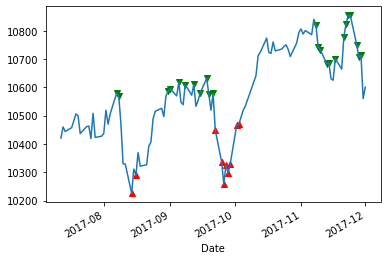

In [8]:
import matplotlib.pyplot as plt

df_recent = df.tail(100)
buy = df_recent[df_recent['triple_barrier_signal']==1]['Close']
sell = df_recent[df_recent['triple_barrier_signal']==-1]['Close']
df_recent['Close'].plot()
plt.scatter(buy.index,buy.values,color='red',marker='^')
plt.scatter(sell.index,sell.values,color='green',marker='v')
plt.show()

# 建立ohlcv

In [9]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

https://sharegpt.com/c/lXPO7as

count    2439.000000
mean       52.496796
std        12.475138
min         0.000000
25%        43.818297
50%        53.831818
75%        61.716360
max        82.366855
Name: RSI, dtype: float64


<ipython-input-10-4c3c4c479738>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = TA.RSI(ohlcv)
<ipython-input-10-4c3c4c479738>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RSI'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970


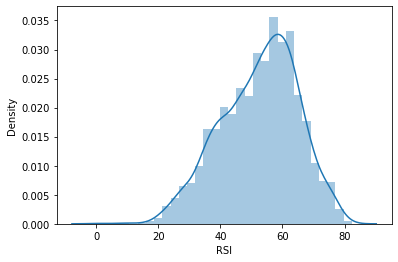

In [10]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    2427.000000
mean      -42.804457
std        32.132155
min      -100.000000
25%       -72.204932
50%       -37.639796
75%       -12.604659
max        -0.000000
Name: Williams %R, dtype: float64


<ipython-input-11-7d686e802fee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Williams %R'] = TA.WILLIAMS(ohlcv)
<ipython-input-11-7d686e802fee>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Williams %R'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522


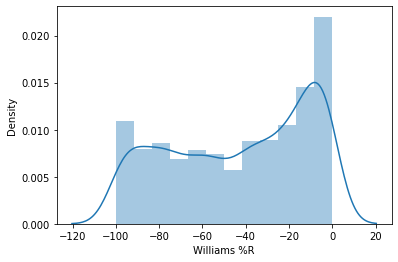

In [11]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count     2400.000000
mean      8167.142363
std       1223.887653
min       4461.422953
25%       7546.744802
50%       8253.969917
75%       8915.533495
max      10719.048542
Name: SMA, dtype: float64


<ipython-input-12-f5fe9346dc29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA'] = TA.SMA(ohlcv)
<ipython-input-12-f5fe9346dc29>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SMA'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542


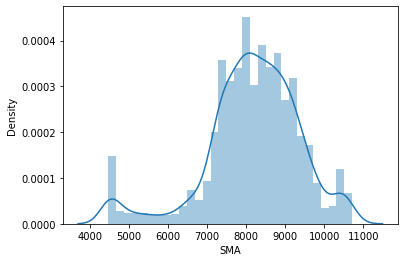

In [12]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count     2440.000000
mean      8182.370635
std       1246.714103
min       4300.800227
25%       7563.202905
50%       8249.966337
75%       8976.015987
max      10791.876951
Name: EMA, dtype: float64


<ipython-input-13-fc487700578c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA'] = TA.EMA(ohlcv)
<ipython-input-13-fc487700578c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EMA'])


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675


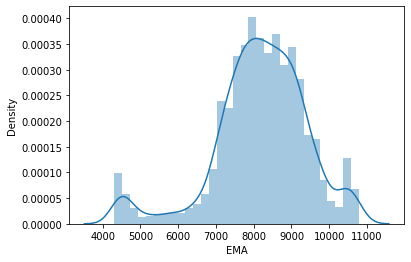

In [13]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count     2432.000000
mean      8183.933690
std       1253.193025
min       4234.718896
25%       7560.788354
50%       8256.428700
75%       8994.139686
max      10803.862695
Name: WMA, dtype: float64


<ipython-input-14-47d0318f8f86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WMA'] = TA.WMA(ohlcv)
<ipython-input-14-47d0318f8f86>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WMA'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024,10778.859266
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282,10771.755556
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786,10764.249523
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315,10724.154731
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675,10695.183637


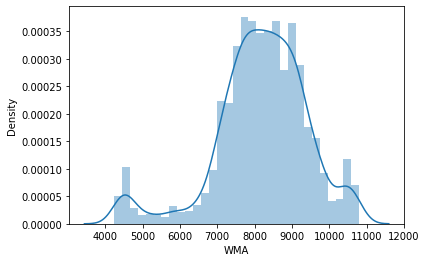

In [14]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count     2422.000000
mean      8186.711668
std       1264.626330
min       4094.401396
25%       7548.727487
50%       8279.054199
75%       9011.399171
max      10819.708422
Name: HMA, dtype: float64


<ipython-input-15-a7e4d90d4bbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HMA'] = TA.HMA(ohlcv)
<ipython-input-15-a7e4d90d4bbc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HMA'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024,10778.859266,10801.425588
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282,10771.755556,10810.802101
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786,10764.249523,10803.126550
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315,10724.154731,10765.366002
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675,10695.183637,10716.146729


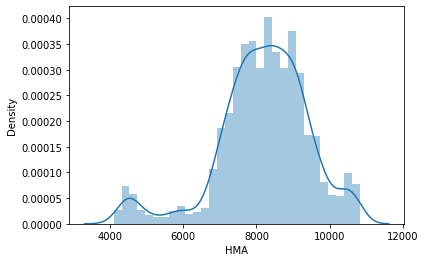

In [15]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count     2440.000000
mean      8186.538081
std       1258.802378
min       4104.984137
25%       7555.057271
50%       8274.701414
75%       8999.632361
max      10844.010084
Name: TEMA, dtype: float64


<ipython-input-16-2f860284cd53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TEMA'] = TA.TEMA(ohlcv)
<ipython-input-16-2f860284cd53>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TEMA'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024,10778.859266,10801.425588,10812.087590
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282,10771.755556,10810.802101,10768.465082
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786,10764.249523,10803.126550,10742.901741
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315,10724.154731,10765.366002,10651.802965
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675,10695.183637,10716.146729,10614.173107


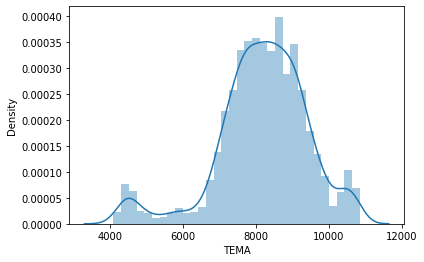

In [16]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    2439.000000
mean       14.975449
std       110.556915
min      -367.416775
25%       -71.844955
50%        33.695777
75%       101.312215
max       347.439300
Name: CCI, dtype: float64


<ipython-input-17-f3a36296c205>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CCI'] = TA.CCI(ohlcv)
<ipython-input-17-f3a36296c205>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CCI'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024,10778.859266,10801.425588,10812.087590,24.334703
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282,10771.755556,10810.802101,10768.465082,-46.292098
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786,10764.249523,10803.126550,10742.901741,-33.931982
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315,10724.154731,10765.366002,10651.802965,-157.880218
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675,10695.183637,10716.146729,10614.173107,-141.552274


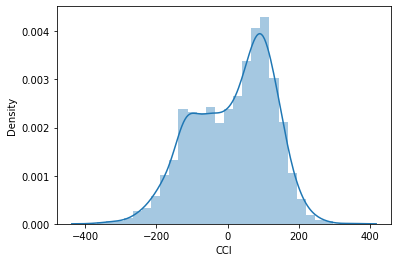

In [17]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    2439.000000
mean        5.441366
std        29.509395
min      -100.000000
25%       -15.322871
50%         8.315922
75%        27.183769
max        78.416508
Name: CMO, dtype: float64


<ipython-input-18-636d59457fe4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CMO'] = TA.CMO(ohlcv)
<ipython-input-18-636d59457fe4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CMO'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024,10778.859266,10801.425588,10812.087590,24.334703,0.461869
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282,10771.755556,10810.802101,10768.465082,-46.292098,-9.474593
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786,10764.249523,10803.126550,10742.901741,-33.931982,-7.725610
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315,10724.154731,10765.366002,10651.802965,-157.880218,-34.993310
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675,10695.183637,10716.146729,10614.173107,-141.552274,-24.345755


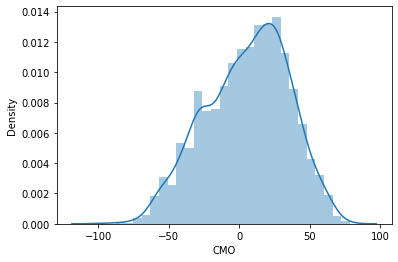

In [18]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    2440.000000
mean        0.033899
std        28.271352
min      -129.904255
25%       -17.721082
50%         0.333094
75%        17.963866
max        84.181016
Name: MACD, dtype: float64


<ipython-input-19-a2be88ba92a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
<ipython-input-19-a2be88ba92a9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MACD'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024,10778.859266,10801.425588,10812.087590,24.334703,0.461869,3.124413
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282,10771.755556,10810.802101,10768.465082,-46.292098,-9.474593,-2.899290
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786,10764.249523,10803.126550,10742.901741,-33.931982,-7.725610,-6.350086
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315,10724.154731,10765.366002,10651.802965,-157.880218,-34.993310,-18.177453
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675,10695.183637,10716.146729,10614.173107,-141.552274,-24.345755,-22.274350


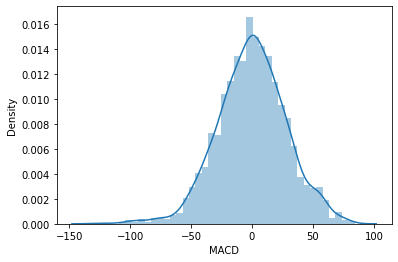

In [19]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    2440.000000
mean        0.000346
std         0.381606
min        -1.548843
25%        -0.220136
50%        -0.003614
75%         0.215815
max         1.519703
Name: PPO, dtype: float64


<ipython-input-20-a12562319965>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
<ipython-input-20-a12562319965>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PPO'].dropna())


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024,10778.859266,10801.425588,10812.087590,24.334703,0.461869,3.124413,0.028703
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282,10771.755556,10810.802101,10768.465082,-46.292098,-9.474593,-2.899290,-0.027305
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786,10764.249523,10803.126550,10742.901741,-33.931982,-7.725610,-6.350086,-0.059387
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315,10724.154731,10765.366002,10651.802965,-157.880218,-34.993310,-18.177453,-0.169554
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675,10695.183637,10716.146729,10614.173107,-141.552274,-24.345755,-22.274350,-0.207836


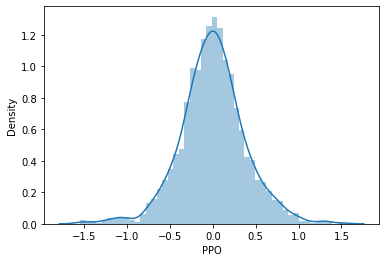

In [20]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

<ipython-input-21-d4d0f2e10498>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROC'] = TA.ROC(ohlcv)
<ipython-input-21-d4d0f2e10498>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ROC'].dropna())


count    2428.000000
mean        0.222183
std         4.110471
min       -18.792148
25%        -1.764564
50%         0.507063
75%         2.582657
max        17.166721
Name: ROC, dtype: float64


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024,10778.859266,10801.425588,10812.087590,24.334703,0.461869,3.124413,0.028703,0.071302
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282,10771.755556,10810.802101,10768.465082,-46.292098,-9.474593,-2.899290,-0.027305,-0.238520
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786,10764.249523,10803.126550,10742.901741,-33.931982,-7.725610,-6.350086,-0.059387,0.277332
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315,10724.154731,10765.366002,10651.802965,-157.880218,-34.993310,-18.177453,-0.169554,-1.185900
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675,10695.183637,10716.146729,10614.173107,-141.552274,-24.345755,-22.274350,-0.207836,-0.284839


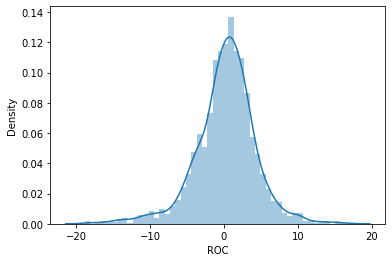

In [21]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

<ipython-input-22-f9a6fb514c9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CFI'] = TA.CFI(ohlcv)
<ipython-input-22-f9a6fb514c9f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CFI'].dropna())


count    2.431000e+03
mean     1.166684e+10
std      6.137661e+09
min     -8.174941e+09
25%      1.043228e+10
50%      1.359743e+10
75%      1.551730e+10
max      1.915761e+10
Name: CFI, dtype: float64


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,10771.479024,10778.859266,10801.425588,10812.087590,24.334703,0.461869,3.124413,0.028703,0.071302,1.915511e+10
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,10758.597282,10771.755556,10810.802101,10768.465082,-46.292098,-9.474593,-2.899290,-0.027305,-0.238520,1.913184e+10
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,10749.587786,10764.249523,10803.126550,10742.901741,-33.931982,-7.725610,-6.350086,-0.059387,0.277332,1.911645e+10
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,10711.758315,10724.154731,10765.366002,10651.802965,-157.880218,-34.993310,-18.177453,-0.169554,-1.185900,1.896636e+10
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,10689.480675,10695.183637,10716.146729,10614.173107,-141.552274,-24.345755,-22.274350,-0.207836,-0.284839,1.887098e+10


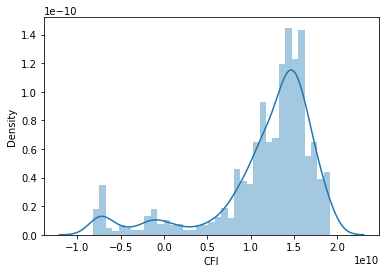

In [22]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

<ipython-input-23-5f9ae8d91f2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
<ipython-input-23-5f9ae8d91f2c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DMI'].dropna())


count    2427.000000
mean       -0.916100
std        16.615416
min      -104.815244
25%       -11.704292
50%         1.079417
75%        10.796332
max        43.725256
Name: DMI, dtype: float64


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,...,10778.859266,10801.425588,10812.087590,24.334703,0.461869,3.124413,0.028703,0.071302,1.915511e+10,-0.255050
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,...,10771.755556,10810.802101,10768.465082,-46.292098,-9.474593,-2.899290,-0.027305,-0.238520,1.913184e+10,-4.912084
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,...,10764.249523,10803.126550,10742.901741,-33.931982,-7.725610,-6.350086,-0.059387,0.277332,1.911645e+10,-3.634997
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,...,10724.154731,10765.366002,10651.802965,-157.880218,-34.993310,-18.177453,-0.169554,-1.185900,1.896636e+10,-14.957378
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,...,10695.183637,10716.146729,10614.173107,-141.552274,-24.345755,-22.274350,-0.207836,-0.284839,1.887098e+10,-18.951341


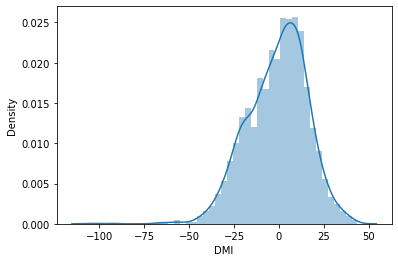

In [23]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

<ipython-input-24-04e925142cba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAR'] = TA.SAR(ohlcv)
<ipython-input-24-04e925142cba>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SAR'].dropna())


count     2440.000000
mean      8160.286609
std       1263.178397
min       3955.429932
25%       7528.556907
50%       8240.583813
75%       8961.548679
max      10882.650391
Name: SAR, dtype: float64


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-27,10836.820312,10856.000000,10746.740234,10750.929688,10750.929688,2668100,-1,51.805625,-46.644857,10690.677806,...,10801.425588,10812.087590,24.334703,0.461869,3.124413,0.028703,0.071302,1.915511e+10,-0.255050,10632.809239
2017-11-28,10733.559570,10752.580078,10692.530273,10707.070312,10707.070312,2961000,-1,48.003328,-62.176313,10699.955626,...,10810.802101,10768.465082,-46.292098,-9.474593,-2.899290,-0.027305,-0.238520,1.913184e+10,-4.912084,10642.802885
2017-11-29,10735.240234,10762.910156,10697.620117,10713.549805,10713.549805,3096300,-1,48.603487,-59.881799,10710.128787,...,10803.126550,10742.901741,-33.931982,-7.725610,-6.350086,-0.059387,0.277332,1.911645e+10,-3.634997,10652.396785
2017-11-30,10623.200195,10650.179688,10560.440430,10560.440430,10560.440430,4939100,0,37.568737,-100.000000,10715.750738,...,10765.366002,10651.802965,-157.880218,-34.993310,-18.177453,-0.169554,-1.185900,1.896636e+10,-14.957378,10882.650391
2017-12-01,10591.620117,10665.919922,10495.150391,10600.370117,10600.370117,3776200,0,41.310970,-72.846522,10719.048542,...,10716.146729,10614.173107,-141.552274,-24.345755,-22.274350,-0.207836,-0.284839,1.887098e+10,-18.951341,10882.650391


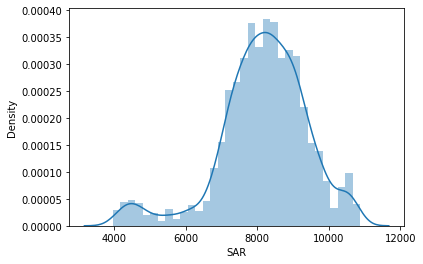

In [24]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# 定義features(X) label(y)

# MACD RSI講一下

In [25]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = ['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR']
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(2440, 22)
(2400, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2017-11-27,51.805625,-46.644857,10690.677806,10771.479024,10778.859266,10801.425588,10812.087590,24.334703,0.461869,3.124413,0.028703,0.071302,1.915511e+10,-0.255050,10632.809239,-1
2017-11-28,48.003328,-62.176313,10699.955626,10758.597282,10771.755556,10810.802101,10768.465082,-46.292098,-9.474593,-2.899290,-0.027305,-0.238520,1.913184e+10,-4.912084,10642.802885,-1
2017-11-29,48.603487,-59.881799,10710.128787,10749.587786,10764.249523,10803.126550,10742.901741,-33.931982,-7.725610,-6.350086,-0.059387,0.277332,1.911645e+10,-3.634997,10652.396785,-1
2017-11-30,37.568737,-100.000000,10715.750738,10711.758315,10724.154731,10765.366002,10651.802965,-157.880218,-34.993310,-18.177453,-0.169554,-1.185900,1.896636e+10,-14.957378,10882.650391,0
2017-12-01,41.310970,-72.846522,10719.048542,10689.480675,10695.183637,10716.146729,10614.173107,-141.552274,-24.345755,-22.274350,-0.207836,-0.284839,1.887098e+10,-18.951341,10882.650391,0


# features scaling(特徵縮放)

In [26]:
from sklearn.preprocessing import MinMaxScaler
import pickle
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = min_max_scaler.fit_transform(df_minmax[features])#縮放到0-1之間
with open('scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2017-11-27,0.577992,0.533551,0.995466,0.996858,0.996194,0.997281,0.995263,0.548014,0.527206,0.621382,0.514102,0.524584,0.999908,0.597233,0.963933,-1
2017-11-28,0.525488,0.378237,0.996949,0.994873,0.995112,0.998676,0.988790,0.449216,0.466941,0.593245,0.495850,0.515968,0.999057,0.554584,0.965376,-1
2017-11-29,0.533775,0.401182,0.998575,0.993485,0.993970,0.997534,0.984997,0.466506,0.477549,0.577126,0.485395,0.530314,0.998494,0.566280,0.966761,-1
2017-11-30,0.381401,0.000000,0.999473,0.987657,0.987866,0.991920,0.971479,0.293117,0.312171,0.521880,0.449493,0.489622,0.993003,0.462591,1.000000,0
2017-12-01,0.433076,0.271535,1.000000,0.984225,0.983456,0.984601,0.965895,0.315958,0.376748,0.502743,0.437017,0.514680,0.989513,0.426014,1.000000,0


In [27]:
df.tail(3)[['RSI','Williams %R','SMA']]

,RSI,Williams %R,SMA
Date,,,
2017-11-29,48.603487,-59.881799,10710.128787
2017-11-30,37.568737,-100.000000,10715.750738
2017-12-01,41.310970,-72.846522,10719.048542


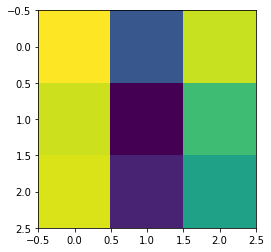

In [28]:
img = df.head(3)[['RSI','Williams %R','MACD']].values
plt.imshow(img)

In [29]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# 定義X,y pair

https://sharegpt.com/c/KcXGMUL

In [30]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:若i為0,則i+days為15因此數據index為0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:若i為0days為15則[i+days-1:i+days]為[14:15]相當於index[14]之y_name('triple_barrier_signal')
  X = np.array(X) # 轉成np_array
  Xs.append(X) #加入至list
  ys.append(y) #加入至list
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 2386/2386 [00:03<00:00, 624.24it/s]

準備完成


# check 資料總數跟 資料時間範圍

In [31]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 2386
第一筆的index開始和結束:2008-03-07-2008-03-27
最後一筆的index開始和結束:2017-11-13-2017-12-01


# Reshape X (圖片數量,長,寬,1張)

In [32]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2386, 15, 15)
(2386, 15, 15, 1)


# One hot encoding of label(獨熱編碼)

原始y代表漲幅

In [33]:
print('One hot encoding前')
print(ys.shape)
print(ys[:5])
from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print('One hot encoding後')
print(ys.shape)
print(ys[:5])

One hot encoding前
(2386, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]
One hot encoding後
(2386, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# Visualization

https://sharegpt.com/c/lQ0OLk6

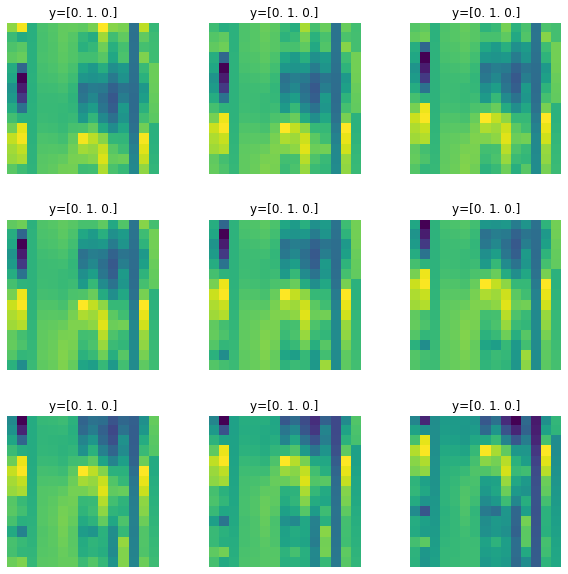

In [34]:
import matplotlib.pyplot as plt

# n为batch大小，这里设为9
n = 9

# 生成一个九宫格的画布
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# 遍历batch中的每一个样本，依次画出对应的矩阵和标注
for i in range(n):
    # 获取当前样本的矩阵和标注
    x = Xs[i]
    y = ys[i]
    
    # 在对应的子图上画出矩阵和标注
    axs[i//3, i%3].imshow(x)
    axs[i//3, i%3].set_title('y={}'.format(y))
    axs[i//3, i%3].axis('off')

# 调整子图之间的距离
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 显示画布
plt.show()


# Split training and test sets

In [35]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(2346, 15, 15, 1) (2346, 3) (40, 15, 15, 1)


# 調整採樣

https://sharegpt.com/c/Vm1VcLs

In [36]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(2346, 225)
(2346,)
0    601
1    601
2    601
Name: 0, dtype: int64
(1803, 15, 15, 1)
(1803, 3)


# Split training and val sets

https://sharegpt.com/c/ZgCDypE

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(1442, 15, 15, 1) (1442, 3) (361, 15, 15, 1) (361, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [38]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    985
2    773
0    628
dtype: int64

In [39]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    601
1    601
2    601
dtype: int64

In [40]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

1    481
2    481
0    480
dtype: int64

In [41]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

0    121
2    120
1    120
dtype: int64

# 用chatgpt幫忙製作模型

https://sharegpt.com/c/M7VugUR

In [42]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout


# 創建一個序列模型
model = Sequential()

# 添加第一個卷積層，使用32個3x3的卷積核，使用ReLU激活函數，並指定輸入形狀
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)))

# 添加第二個卷積層，使用64個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(64, (3, 3), activation='relu'))

# 添加第三個卷積層，使用128個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(128, (3, 3), activation='relu'))

# 添加平坦層，將卷積層的輸出展開為一維數組
model.add(Flatten())

# 添加dropout層，防止過度擬合
model.add(Dropout(0.5))

# 添加全連接層，使用softmax激活函數，輸出3個類別
model.add(Dense(3, activation='softmax'))

# 編譯模型，使用交叉熵損失函數和Adam優化器
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 打印模型結構
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 10368)             0         
                                                                 
 dropout (Dropout)           (None, 10368)             0         
                                                                 
 dense (Dense)               (None, 3)                 31107     
                                                                 
Total params: 123,779
Trainable params: 123,779
Non-trai

In [43]:
'''
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()
'''

"\nnclasses = 3 \nmodel = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32\nmodel.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64\nmodel.add(MaxPool2D(pool_size=(5,5)))# 3,3,64\nmodel.add(Flatten())#576\nmodel.add(Dropout(0.5))#288\nmodel.add(Dense(128, activation='relu'))#128\nmodel.add(Dropout(0.5))#64\nmodel.add(Dense(32, activation='relu'))#32\nmodel.add(Dropout(0.5))#16\nmodel.add(Dense(nclasses, activation='softmax'))#3\nmodel.summary()\n"

# 編譯模型

In [44]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 定義訓練過程的早停法機制

In [45]:
es = EarlyStopping(monitor='val_accuracy',#驗證集acc
                   min_delta=0.0001, 
                   patience=20,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [46]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 200,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/200
12/12 [==============================] - 9s 106ms/step - loss: 1.0910 - accuracy: 0.3634 - val_loss: 1.0642 - val_accuracy: 0.4432
Epoch 2/200
12/12 [==============================] - 0s 13ms/step - loss: 1.0556 - accuracy: 0.4286 - val_loss: 1.0314 - val_accuracy: 0.4321
Epoch 3/200
12/12 [==============================] - 0s 19ms/step - loss: 1.0202 - accuracy: 0.4757 - val_loss: 0.9975 - val_accuracy: 0.4765
Epoch 4/200
12/12 [==============================] - 0s 21ms/step - loss: 1.0156 - accuracy: 0.4619 - val_loss: 0.9847 - val_accuracy: 0.5069
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 0.9855 - accuracy: 0.4910 - val_loss: 0.9672 - val_accuracy: 0.5042
Epoch 6/200
12/12 [==============================] - 0s 22ms/step - loss: 0.9728 - accuracy: 0.5028 - val_loss: 0.9594 - val_accuracy: 0.4903
Epoch 7/200
12/12 [==============================] - 0s 23ms/step - loss: 0.9581 - accuracy: 0.5194 - val_loss: 0.9548 - val_accuracy: 0.4958
Epoch

# chatgpt協助做訓練過程評估

https://sharegpt.com/c/1CqBYQz

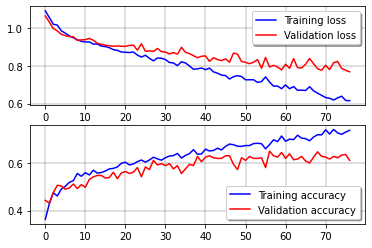

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# chatgpt協助做混淆矩陣

https://sharegpt.com/c/0SZ8tM0

12/12 [==============================] - 0s 7ms/step


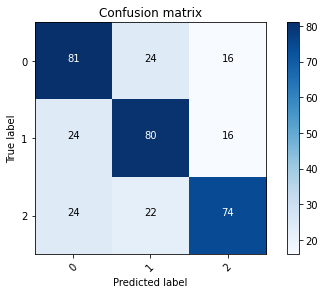

In [48]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
nclasses = 3
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# classification_report 

In [49]:
from sklearn.metrics import classification_report 
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

        Hold       0.63      0.67      0.65       121
         BUY       0.63      0.67      0.65       120
        SELL       0.70      0.62      0.65       120

   micro avg       0.65      0.65      0.65       361
   macro avg       0.65      0.65      0.65       361
weighted avg       0.65      0.65      0.65       361
 samples avg       0.65      0.65      0.65       361



# 驗證集的準確度

In [50]:
def val_acc(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
val_acc(yval,y_pred)

0.6509695290858726

## 測試集預測

2/2 [==============================] - 0s 69ms/step
40
[*********************100%***********************]  1 of 1 completed


<ipython-input-51-c1919451a0d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['SIGNAL'] = answer


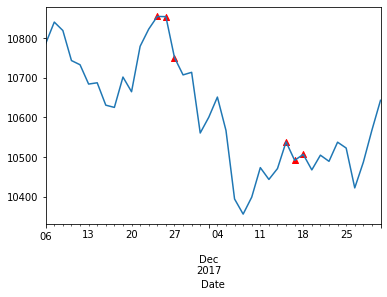

In [51]:
import pandas as pd
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))
C = pd.DataFrame()
C['Close'] = yf.download(y_symbol, start = startdate,end = enddate)['Close']
C['SIGNAL'] = 0
C = C.tail(len(answer))
C['SIGNAL'] = answer 
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 製作交易訊號表格

In [52]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(20)

2/2 [==============================] - 0s 5ms/step


,Close,HOLD%,BUY%,SELL%
Date,,,,
2017-12-04,10651.1104,0.5992,0.3744,0.0265
2017-12-05,10566.8496,0.6757,0.3035,0.0208
2017-12-06,10393.9199,0.7677,0.2138,0.0185
2017-12-07,10355.7598,0.7379,0.2380,0.0241
2017-12-08,10398.6201,0.6328,0.3318,0.0354
2017-12-11,10473.0898,0.6158,0.3438,0.0403
2017-12-12,10443.2803,0.6073,0.3586,0.0341
2017-12-13,10470.7002,0.5146,0.4585,0.0270
2017-12-14,10538.0098,0.4208,0.5512,0.0281


# 保存模型

In [53]:
model.save('model.h5')
del model
from keras.models import load_model
model = load_model('model.h5')
predict = model.predict(X_test)
predict[-5:]

2/2 [==============================] - 0s 5ms/step


array([[0.79926157, 0.1483666 , 0.05237182],
       [0.7335631 , 0.20317622, 0.06326064],
       [0.75586516, 0.17116383, 0.07297106],
       [0.7384252 , 0.15982638, 0.10174841],
       [0.64724773, 0.1845416 , 0.16821072]], dtype=float32)